 
# Data Science Engineering Methods and Tools 
# Assignment 01: Machine Learning Data Cleaning and Feature Selection


# **Backgroud**

At a celebration honoring International Day of Happiness on March 20, the World Happiness 2015, which rates 155 nations according on their happiness levels, was unveiled. As more governments, companies, and members of civil society utilize happiness indices to guide their policy decisions, the report continues to acquire awareness on a global scale. Leading experts from a variety of disciplines, including economics, psychology, survey analysis, national statistics, health, and public policy, explain how well-being indicators can be used to evaluate a country's progress. The studies examine the current state of happiness in the globe and demonstrate how the personal and regional variations in happiness are explained by the new science of happiness.
 
 
 



# **Abstract**


> The goal of this notebook is to predict the happiness score of countries around the world depending upon many factors such as economic production, social support, life expectancy, freedom, absense of corruption and generosity.



> The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset:



> *   What are the data types? (Only numeric and categorical)
*   Are there missing values?
*   What are the likely distributions of the numeric variables?
*   Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
*   Which independent variables have missing data? How much? 
*   Do the training and test sets have the same data?
*   In the predictor variables independent of all the other predictor variables?
*   Which predictor variables are the most important?
*   Do the ranges of the predictor variables make sense?
*   What are the distributions of the predictor variables?   
*   Remove outliers and keep outliers (does if have an effect of the final predictive model)?
*   Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.



> Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model for predicting Happiness score give better predictions

# Importing Libraries and Dataset

In [2]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=575e2edca2208bc357fcec0d538481c8994925097f0dd34dde4e5784e9b221b4
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Information about the Dataset


> Target Variable/Dependent Variable


1.  Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


> Predictor Variables/Independent Variables

1.   Country: Name of the country
2.   Region: Region of the country belongs to or continent
3.   Happiness Rank: Ranking of the countries according to their happiness score
4.   Standard Error: the standard error of the happiness score
5.   Economy (GDP per Capita): measures the monetary value of the final goods and services. The extent to which GDP contributes to the calculation of the Happiness score.
6.   Family: The extent to which Family values contribute to the calculation of the Happiness score.
7.   Health (Life Expectancy): The extent to which Health / Life Expectancy contribute to the happiness score calculations.
8.   Freedom: Freedom in all terms for people in any country contributing to the calculation of the Happiness score
9.   Trust (Government Corruption): Trust/ Government Corruption values of a country effecting Happiness score
10.  Generosity: the quality of being kind and generous.
11.  Dystopia Residual:  It is the sum of the dystopia happiness score (1.85) ie score of a hypothetical country having rank lower than the lowest ranking country in the report




















In [4]:
Data = pd.read_csv("https://raw.githubusercontent.com/Hanagojiv/DataSci/main/2015.csv")

In [5]:
Data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#Getting the list of categorical columns
categorical_cols = Data.select_dtypes(include=['object']).columns.tolist()

# Q1. What are the data types of our dataset variables?

In [7]:
#Getting the list of numerical columns
numerical_cols = Data.select_dtypes(exclude=['object']).columns.tolist()

In [8]:
#Printing the list of categorical and numerical columns
print("--------------------------------------------------------")
print("                 Categorical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("--------------------------------------------------------")
print("                 Numerical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of num variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 2
1. Country
2. Region


--------------------------------------------------------
                 Numerical Variables                  
--------------------------------------------------------
Total number of num variables in our dataset: 10
1. Happiness Rank
2. Happiness Score
3. Standard Error
4. Economy (GDP per Capita)
5. Family
6. Health (Life Expectancy)
7. Freedom
8. Trust (Government Corruption)
9. Generosity
10. Dystopia Residual


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Q2. Are there missing values? Which independent variables have missing data? How much?

In [10]:
#Checking missing values in our data
Data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Observations

We have 0% missing values both in our independent variables as well as dependent variable

# Q3. What are the likely distributions of the numeric variables?

**1. Happiness Rank**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of Happiness Rank is  79.49
The median of Happiness Rank is  79.5
The Mode of Happiness Rank is  0    82
dtype: int64


Text(0.5, 1.0, 'Distribution curve for Happiness Rank')

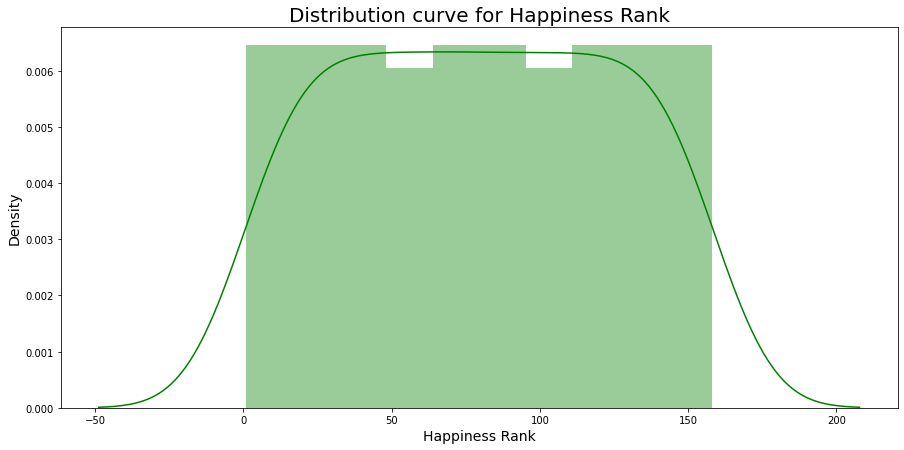

In [11]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Happiness Rank'], bins=10, color = "green")
print("The mean of Happiness Rank is ",round(Data['Happiness Rank'].mean(),2))
print("The median of Happiness Rank is ",Data['Happiness Rank'].median())
print("The Mode of Happiness Rank is ",Data['Happiness Rank'].mode())
plt.xlabel("Happiness Rank", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Happiness Rank', size=20)

**2. Happiness Score**

The mean of Happiness Score is  5.38
The median of Happiness Score is  5.2325
The Mode of Happiness Score is  0    5.192
dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve for Happiness Score')

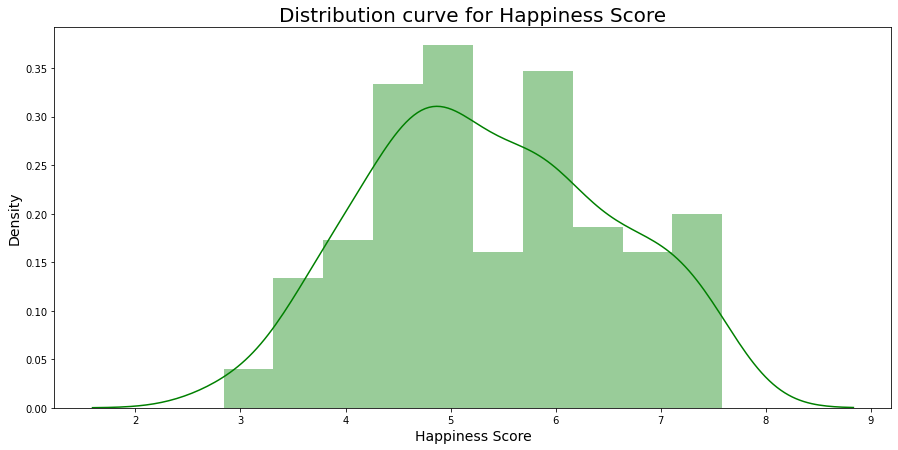

In [12]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Happiness Score'], bins=10, color = "green")
print("The mean of Happiness Score is ",round(Data['Happiness Score'].mean(),2))
print("The median of Happiness Score is ",Data['Happiness Score'].median())
print("The Mode of Happiness Score is ",Data['Happiness Score'].mode())
plt.xlabel("Happiness Score", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Happiness Score', size=20)

**3. Standard Error**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of Standard Error is  0.05
The median of Standard Error is  0.04394


Text(0.5, 1.0, 'Distribution curve for Standard Error')

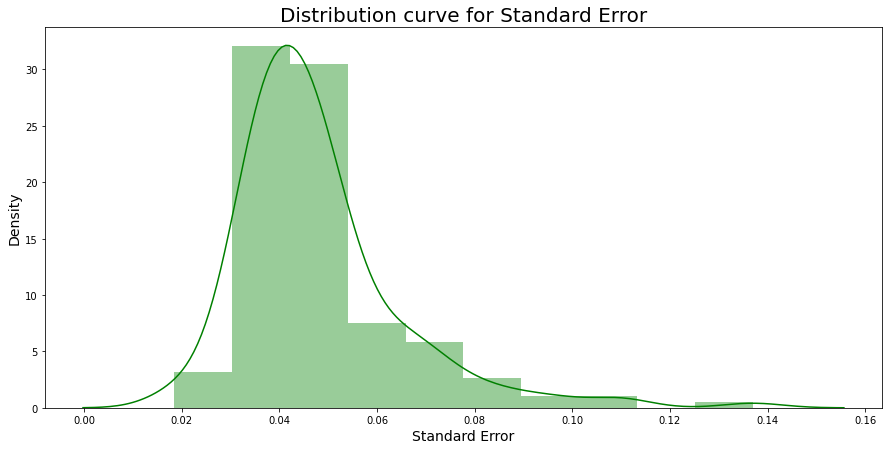

In [13]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Standard Error'], bins=10, color = "green")
print("The mean of Standard Error is ",round(Data['Standard Error'].mean(),2))
print("The median of Standard Error is ",Data['Standard Error'].median())
plt.xlabel("Standard Error", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Standard Error', size=20)

**4. Economy (GDP per Capita)**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of Economy (GDP per Capita) is  0.85
The median of Economy (GDP per Capita) is  0.910245


Text(0.5, 1.0, 'Distribution curve for Economy (GDP per Capita)')

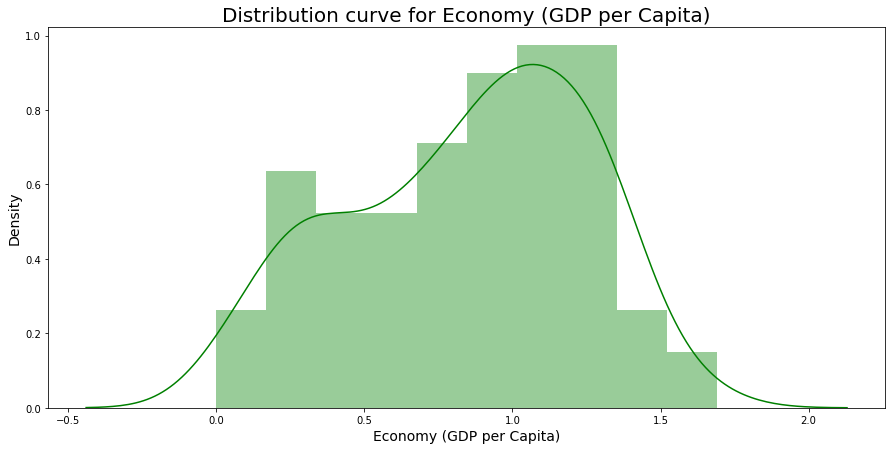

In [14]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Economy (GDP per Capita)'], bins=10, color = "green")
print("The mean of Economy (GDP per Capita) is ",round(Data['Economy (GDP per Capita)'].mean(),2))
print("The median of Economy (GDP per Capita) is ",Data['Economy (GDP per Capita)'].median())
plt.xlabel("Economy (GDP per Capita)", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Economy (GDP per Capita)', size=20)

**5. Family**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of Family is  0.99
The median of Family is  1.02951


Text(0.5, 1.0, 'Distribution curve for Family')

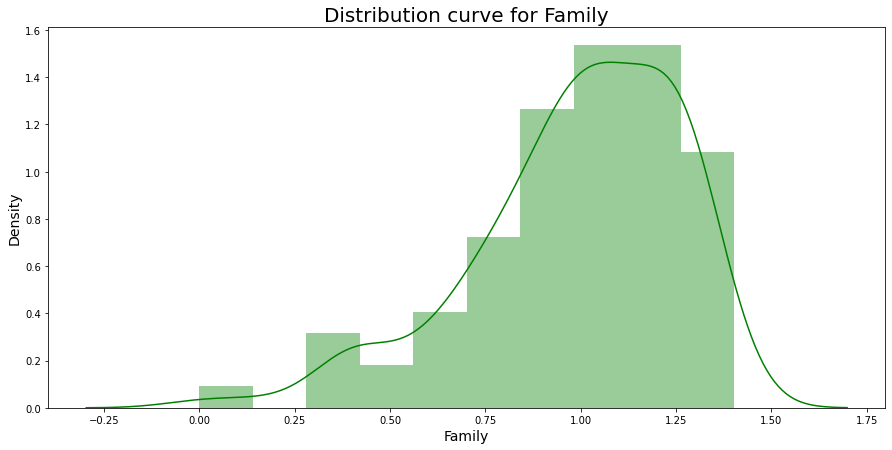

In [15]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Family'], bins=10, color = "green")
print("The mean of Family is ",round(Data['Family'].mean(),2))
print("The median of Family is ",Data['Family'].median())
plt.xlabel("Family", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Family', size=20)

**6. Health (Life Expectancy)**

The mean of Health (Life Expectancy) is  0.63
The median of Health (Life Expectancy) is  0.6967049999999999
The Mode of Health (Life Expectancy) is  0    0.92356
dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve for Health (Life Expectancy)')

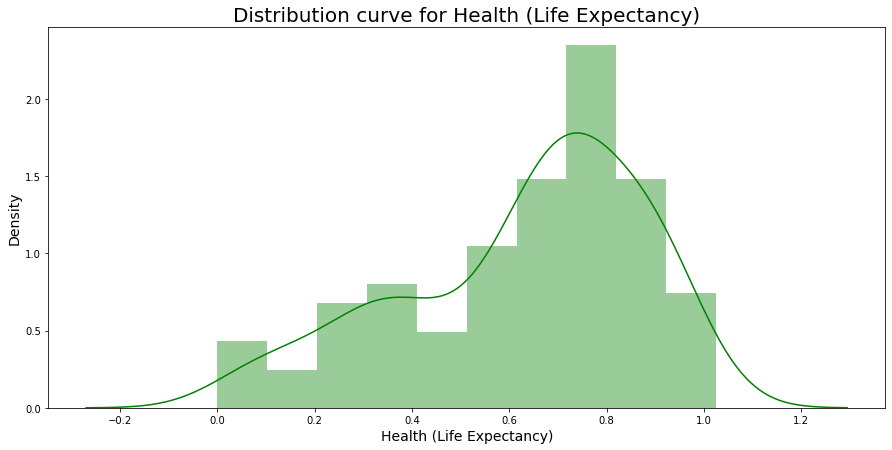

In [16]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Health (Life Expectancy)'], bins=10, color = "green")
print("The mean of Health (Life Expectancy) is ",round(Data['Health (Life Expectancy)'].mean(),2))
print("The median of Health (Life Expectancy) is ",Data['Health (Life Expectancy)'].median())
print("The Mode of Health (Life Expectancy) is ",Data['Health (Life Expectancy)'].mode())
plt.xlabel("Health (Life Expectancy)", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Health (Life Expectancy)', size=20)

**7. Freedom**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of  Freedom is  0.43
The median of Freedom is  0.435515


Text(0.5, 1.0, 'Distribution curve for Freedom')

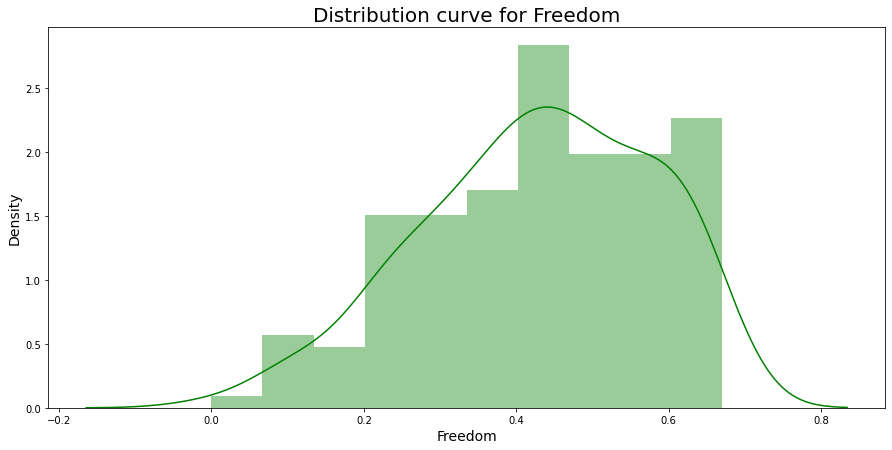

In [17]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Freedom'], bins=10, color = "green")
print("The mean of  Freedom is ",round(Data['Freedom'].mean(),2))
print("The median of Freedom is ",Data['Freedom'].median())
plt.xlabel("Freedom", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Freedom', size=20)

**8. Trust (Government Corruption)**

The mean of Trust (Government Corruption) is  0.14
The median of Trust (Government Corruption) is  0.10722000000000001
The Mode of Trust (Government Corruption) is  0    0.32524
dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve for Trust (Government Corruption)')

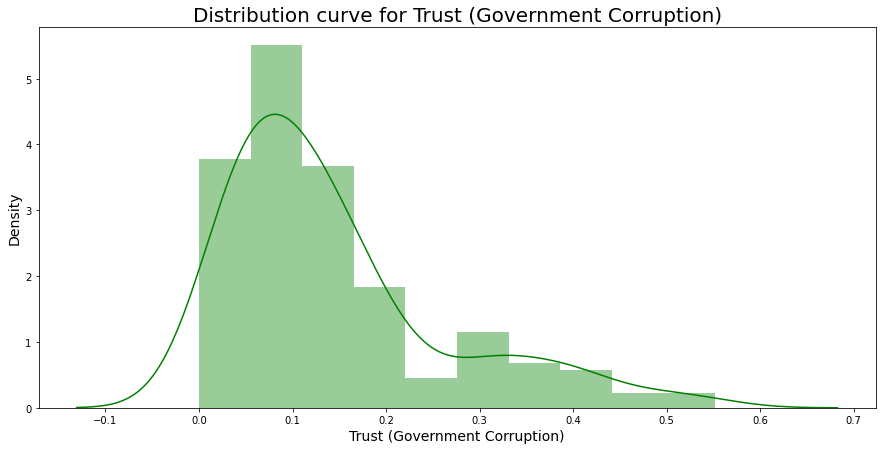

In [18]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Trust (Government Corruption)'], bins=10, color = "green")
print("The mean of Trust (Government Corruption) is ",round(Data['Trust (Government Corruption)'].mean(),2))
print("The median of Trust (Government Corruption) is ",Data['Trust (Government Corruption)'].median())
print("The Mode of Trust (Government Corruption) is ",Data['Trust (Government Corruption)'].mode())
plt.xlabel("Trust (Government Corruption)", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Trust (Government Corruption)', size=20)

**9. Generosity**

The mean of Generosity is  0.24
The median of Generosity is  0.21613


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve for Generosity')

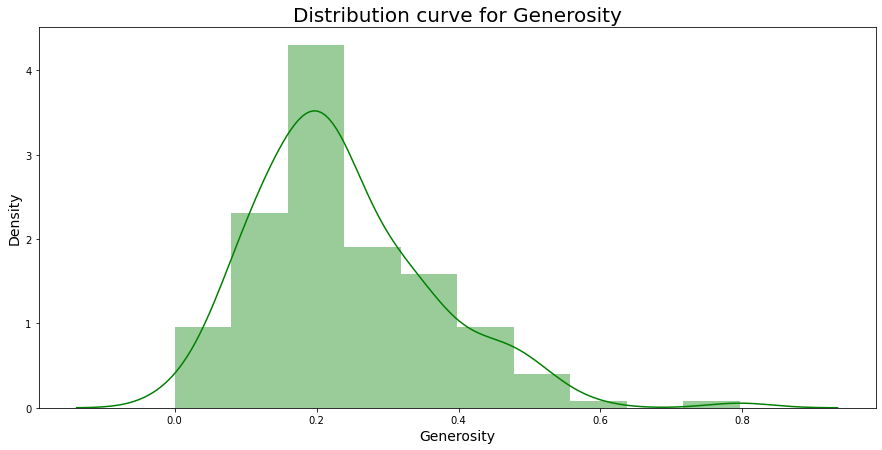

In [19]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Generosity'], bins=10, color = "green")
print("The mean of Generosity is ",round(Data['Generosity'].mean(),2))
print("The median of Generosity is ",Data['Generosity'].median())
plt.xlabel("Generosity", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Generosity', size=20)

**10. Dystopia Residual**

The mean of Dystopia Residual is  2.1
The median of Dystopia Residual is  2.095415


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve for Dystopia Residual')

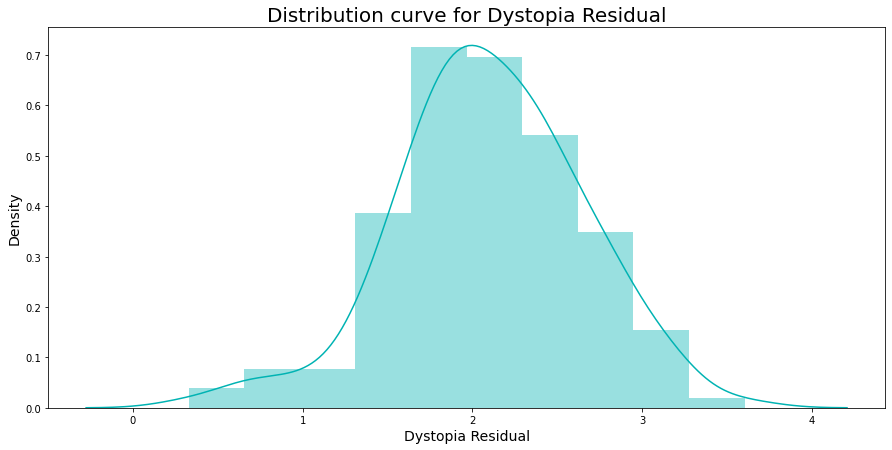

In [20]:
plt.figure(figsize=(15,7))
sns.distplot(Data['Dystopia Residual'], bins=10, color = "#00b3b3")
print("The mean of Dystopia Residual is ",round(Data['Dystopia Residual'].mean(),2))
print("The median of Dystopia Residual is ",Data['Dystopia Residual'].median())
plt.xlabel("Dystopia Residual", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Dystopia Residual', size=20)

Splitting the data into 2 data frames 
1. Predictor Variables
2. Target Variable - Happiness Score

In [21]:
y = Data['Happiness Score']
x = Data.drop('Happiness Score', axis = 1)
data_total = Data

In [22]:
x=x.drop('Happiness Rank', axis = 1)

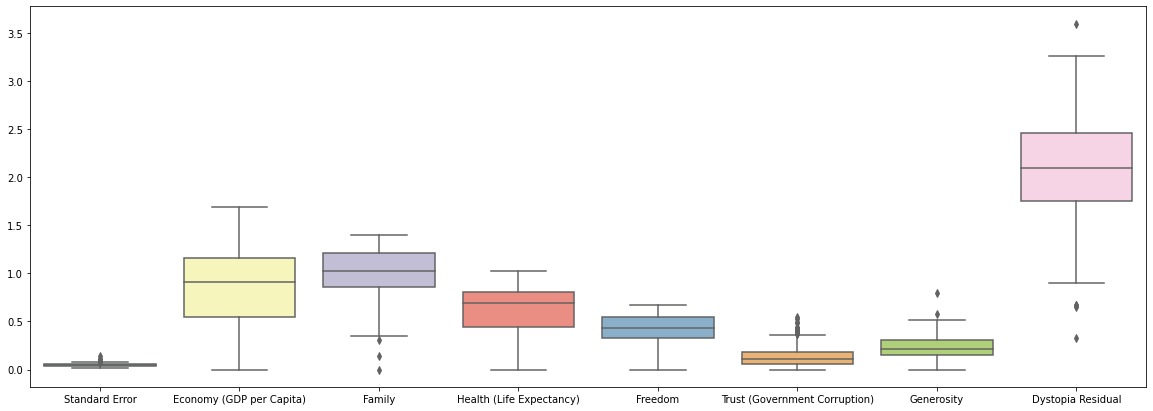

In [23]:
#Checking the range of the predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")

In [24]:
df = pd.DataFrame(x)

In [25]:
df.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
xdata= df.drop(df.loc[:, 'Country':'Region'].columns, axis=1)

In [27]:
x =xdata

In [100]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,0.826132,0.962403,0.918244,0.66557,0.41978,0.29678,0.668630
1,0.04884,0.770412,1.000000,0.924496,0.62877,0.14145,0.43630,0.725030
2,0.03328,0.784113,0.970297,0.853099,0.64938,0.48357,0.34139,0.660889
3,0.03880,0.863099,0.949167,0.863409,0.66973,0.36503,0.34699,0.652724
4,0.03553,0.784592,0.943219,0.883326,0.63297,0.32957,0.45811,0.648584


# Q4. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [86]:
d_test = pd.read_csv("https://raw.githubusercontent.com/Hanagojiv/DataSci/main/2015.csv")

In [101]:
import pandas as pd
from pandas.api.types import is_numeric_dtype


def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    print(quant_df)
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(d_test)

      Happiness Rank  Happiness Score  Standard Error  \
0.05            8.85          3.65585        0.031036   
0.95          150.15          7.29770        0.079260   

      Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0.05                  0.186325  0.415606                  0.151588  0.170474   
0.95                  1.394645  1.318472                  0.942084  0.641588   

      Trust (Government Corruption)  Generosity  Dystopia Residual  
0.05                       0.015823    0.071195           1.236587  
0.95                       0.401446    0.475174           3.037456  


In [93]:
df.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
12,0.03751,0.791064,0.924984,0.868491,0.62433,0.18676,0.33088,0.673463
14,0.03839,0.824949,0.889376,0.840566,0.54604,0.15890,0.40105,0.666409
18,0.03595,0.773666,0.916868,0.874587,0.58450,0.22540,0.22250,0.637306
21,0.05335,0.804599,0.771500,0.743975,0.63274,0.32524,0.21542,0.655650
24,0.04910,0.629151,0.854710,0.776991,0.54210,0.09270,0.24434,0.769774


# Q5. Do the ranges of the predictor variables make sense?

Plotting the range of all predictor variables values individually

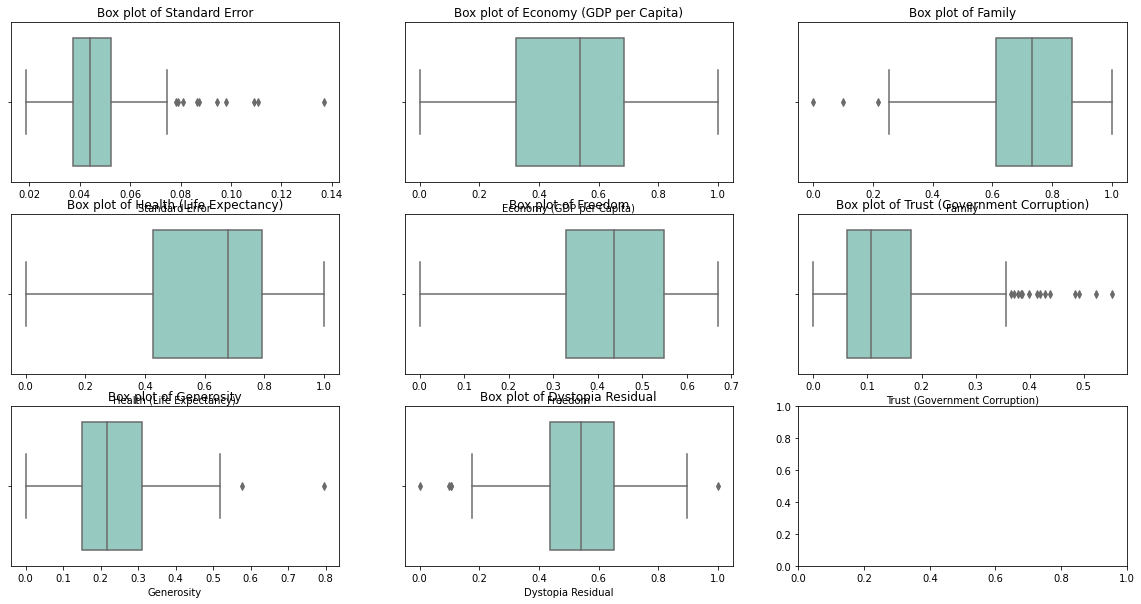

In [92]:
#Checking the Ranges of the predictor variables individually
cols = list(df.columns) 
f, axs = plt.subplots(3,3,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(3,3,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(xdata[cols[i]], palette = 'Set3')
plt.show()

Normalizing the dataset
We need to scale our numerical columns. Although we can use any scaling technique, we will be using normalization as we want to have values in the range of [0,1] and also to detect outliers as normalization is highly affected my outliers

In [30]:
# list of numerical columns which require normalization
num_cols=['Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Dystopia Residual']

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [31]:
x.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.500549,0.706764,0.614737,0.428615,0.143422,0.237296,0.540817
std,0.017146,0.238474,0.194240,0.240993,0.150693,0.120034,0.126685,0.169097
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037268,0.322883,0.611043,0.428369,0.328330,0.061675,0.150553,0.437087
50%,0.043940,0.538473,0.734195,0.679546,0.435515,0.107220,0.216130,0.539729
75%,0.052300,0.685302,0.866053,0.791039,0.549092,0.180255,0.309883,0.651839
max,0.136930,1.000000,1.000000,1.000000,0.669730,0.551910,0.795880,1.000000


Observations:
We can see that the numerical variables - Economy (GDP per Capital), Family, Health (Life Expectancy) and Dystopia Residual are now in the range of 0 to 1

Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

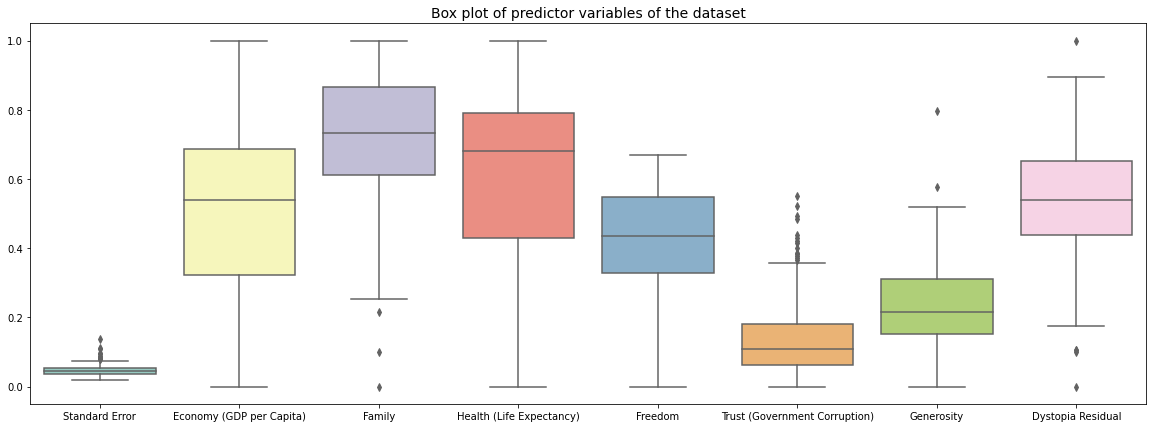

In [32]:
#Checking the Ranges of the predictor variables together after normalization of numerical variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

# Q6. Are the predictor variables independent of all other predictor variables?

In [33]:
x.corr()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Standard Error,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Observations:

At first glance we can see that that the variables have collinearity to some extent. To visualize the values lets check the heatmap next

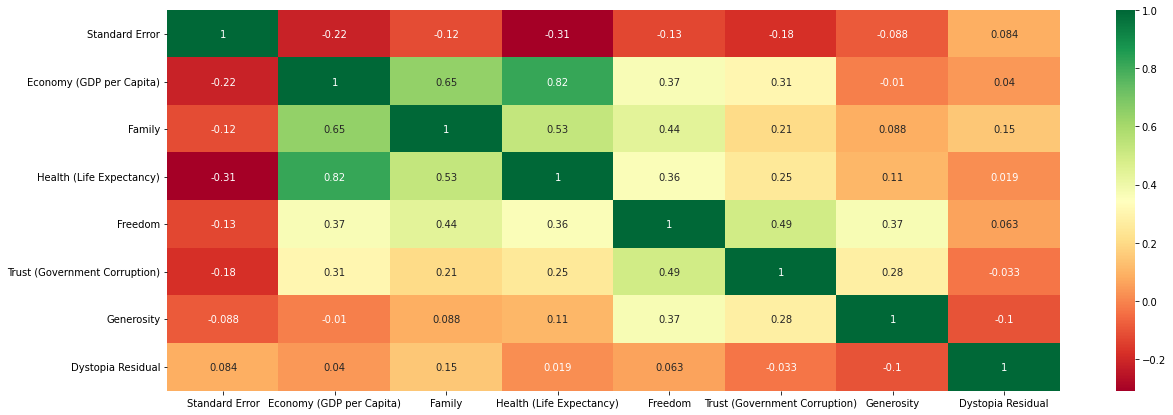

In [34]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

Observations:

1. It is very clear from the heatmap that most of the variables are dependent on each other like Health(Life Expectancy) and Economy (GDP per capita); Family and Economy (GDP per Capita); Trust (Government Corruption) and Freedom.
2. Degree of collinearity is significantly less that 0.5 for most variables.
3. The Health(Life Expectancy) and Economy (GDP per Capita) have a degree of collinearity of 0.82





Creating a Train - Test split for our model training and predictions

In [35]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [36]:
print(y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64


# Q7. Do the training and test sets have the same data?

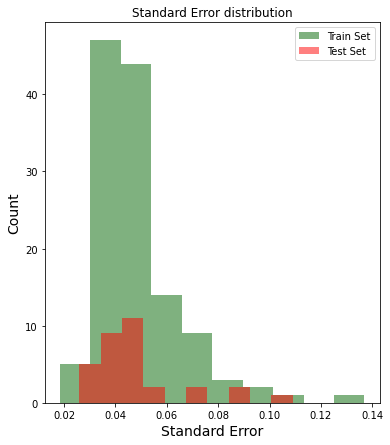

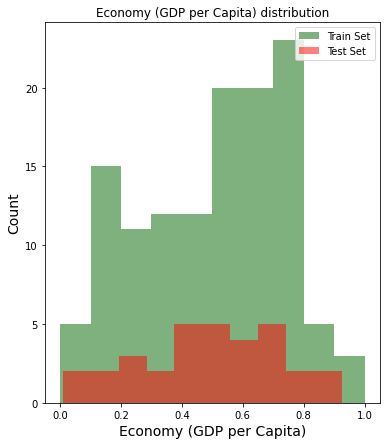

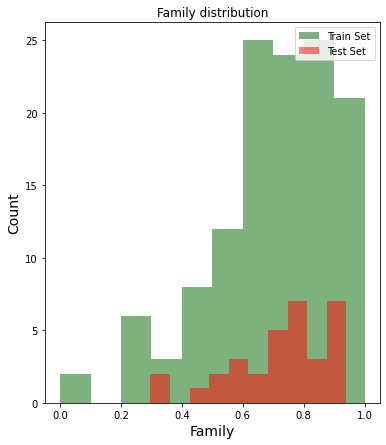

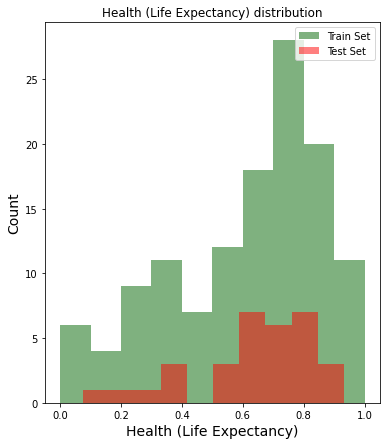

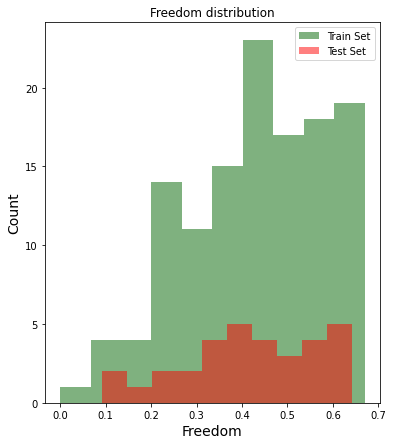

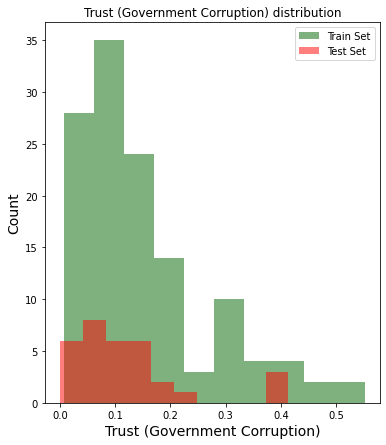

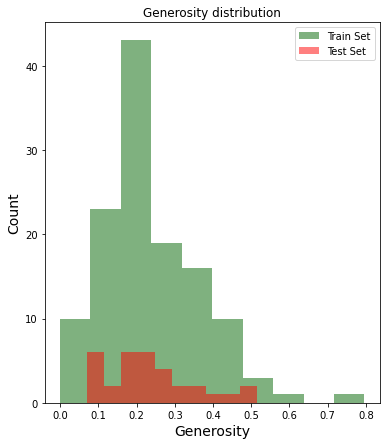

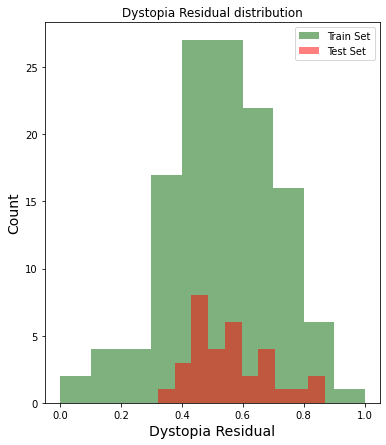

In [37]:
# Looking the data for test and training set
X_test_plot = X_test
X_train_plot = X_train

#Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(6,7))
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

Observations:

The ratio of 80%-20% for train-test split appears to be distributed correctly for all the variables

# Q8. Which predictor variables are the most useful to predict a target?

In [38]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm



import statsmodels.api as sm
model = sm.OLS(y, x[['Standard Error','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.086e+05
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                   2.53e-299
Time:                        00:52:40   Log-Likelihood:                          242.64
No. Observations:                 158   AIC:                                     -469.3
Df Residuals:                     150   BIC:                                     -444.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Standard Error                    1.8466      0.219      8.450      0.000       1.415       2.278
Economy (GDP per Capita)          1.6154      0.036     45.202      0.000       1.545       1.686
Family                            1.5179      0.029     52.086      0.000       1.460       1.576
Health (Life Expectancy)          1.1446      0.031     37.121      0.000       1.084       1.206
Freedom                           1.0431      0.037     27.972      0.000       0.969       1.117
Trust (Government Corruption)     1.0294      0.043     24.168      0.000       0.945       1.114
Generosity                        1.0937      0.037     29.185      0.000       1.020       1.168
Dystopia Residual                 3.4018      0.024    143.360      0.000       3.355       3.449
==============================================================================
Omnibus:                        3.054   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.607
Skew:                          -0.237   Prob(JB):                        0.272
Kurtosis:                       3.415   Cond. No.                         68.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
All predictor variables are significant.
 

1.   Standard Error has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
2.   Economy (GDP per Capita) has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
3.   Family has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
4.   Health (Life Expectancy) has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
5.   Freedom has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
6.   Trust (Government Corruption) has a p-value of 0.5 which is lesser than 0.05 so it is a significant feature
7.   Generosity has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
8.   Dystopia Residual has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature










Method 2 - Using Gradient Boosting Classifier Results

In [39]:
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [40]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print('Linear Regression Score: ', lr_score)

Linear Regression Score:  0.9999999323779599


In [41]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
yn = lab.fit_transform(y)

In [42]:
from sklearn.model_selection import  train_test_split

#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(xdata, yn, test_size=0.2, random_state=1)

Text(0.5, 1.0, 'Feature Importance ')

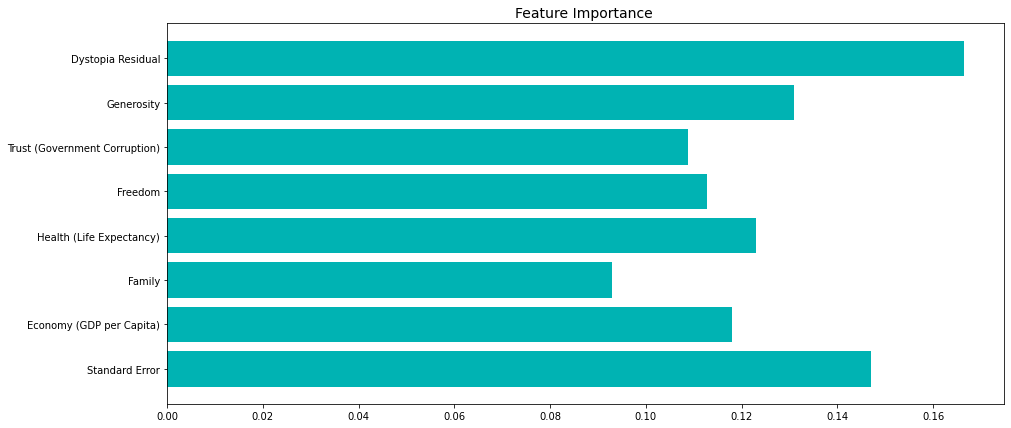

In [43]:
from sklearn import ensemble
model_2=ensemble.GradientBoostingClassifier()
model_2.fit(X_train,y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_2.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance ', size=14)

Observations:

Using gradient boosting method also we get similar results as the with our numerical columns(Standard Error, Economy, Family, Health, Freedom, Trust(Government Corruption), Generosity, Dystopia Residual) having noticable significance.

Now, let's understand the important features in the dataset.

In [44]:
import eli5

In [45]:
#Understanding the important features 
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Weight,Feature
0 ± 0.0000,Dystopia Residual
0 ± 0.0000,Generosity
0 ± 0.0000,Trust (Government Corruption)
0 ± 0.0000,Freedom
0 ± 0.0000,Health (Life Expectancy)
0 ± 0.0000,Family
0 ± 0.0000,Economy (GDP per Capita)
0 ± 0.0000,Standard Error


In [46]:
x = xdata[ ['Standard Error','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
y = Data['Happiness Score']

x_t, x_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.15, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [48]:
from mlxtend.evaluate import bias_variance_decomp

In [49]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model


linear_regression = LinearRegression()
linear_regression.fit(x_t, y_t)
y_pred = linear_regression.predict(x_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,y_train)


LinearRegression()

In [51]:
# Make predictions using the training set
y_pred = regr.predict(x_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on tarining set = 0.9999999515334573


In [52]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on test set = 0.9999998821220464


In [53]:
y_pred = regr.predict(x_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on validation set = 0.9999998787628173


In [54]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.3994 ± 0.0841,Dystopia Residual
0.2462 ± 0.1478,Economy (GDP per Capita)
0.0939 ± 0.0297,Family
0.0917 ± 0.0230,Health (Life Expectancy)
0.0425 ± 0.0195,Freedom
0.0310 ± 0.0169,Generosity
0.0198 ± 0.0112,Trust (Government Corruption)
-0.0000 ± 0.0000,Standard Error


Observations:

1.   From the graph we can see that Dystopia Residual, Economy (GDP per Capita) and Family appear to be the most significant features.
2.   All other variables are more or less at significanct level, slightly low as compared to Dystopia Residual, Economy (GDP per Capita) and Family.




In [55]:
num_cols=['Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Family','Health (Life Expectancy)','Dystopia Residual']
feature_to_scale = num_cols
min_max_scaler = preprocessing.MinMaxScaler()
data_total[feature_to_scale] = min_max_scaler.fit_transform(data_total[feature_to_scale])
data_total.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,0.000000,1.000000,0.03411,0.826132,0.962403,0.918244,0.66557,0.41978,0.29678,0.668630
1,Iceland,Western Europe,0.006369,0.994524,0.04884,0.770412,1.000000,0.924496,0.62877,0.14145,0.43630,0.725030
2,Denmark,Western Europe,0.012739,0.987363,0.03328,0.784113,0.970297,0.853099,0.64938,0.48357,0.34139,0.660889
3,Norway,Western Europe,0.019108,0.986310,0.03880,0.863099,0.949167,0.863409,0.66973,0.36503,0.34699,0.652724
4,Canada,North America,0.025478,0.966302,0.03553,0.784592,0.943219,0.883326,0.63297,0.32957,0.45811,0.648584


In [75]:
df = pd.DataFrame(data_total)

In [57]:
df = pd.DataFrame(data_total)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.9+ KB


# Q10 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [60]:
# remove 1% data randomly 
df_part_1per = df[['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']];
col_list = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for col in col_list:
    df_part_1per.loc[df_part_1per.sample(frac=0.01).index, col] = pd.np.nan
    


In [99]:
df.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
12,0.03751,0.791064,0.924984,0.868491,0.62433,0.18676,0.33088,0.673463
14,0.03839,0.824949,0.889376,0.840566,0.54604,0.15890,0.40105,0.666409
18,0.03595,0.773666,0.916868,0.874587,0.58450,0.22540,0.22250,0.637306
21,0.05335,0.804599,0.771500,0.743975,0.63274,0.32524,0.21542,0.655650
24,0.04910,0.629151,0.854710,0.776991,0.54210,0.09270,0.24434,0.769774


In [64]:
df_part_1per.isnull().sum()

Happiness Rank                   2
Happiness Score                  2
Standard Error                   2
Economy (GDP per Capita)         2
Family                           2
Health (Life Expectancy)         2
Freedom                          2
Trust (Government Corruption)    2
Generosity                       2
Dystopia Residual                2
dtype: int64

In [65]:
# remove 5% data randomly 
df_part_5per = df[['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']];
for col in col_list:
    df_part_5per.loc[df_part_5per.sample(frac=0.05).index, col] = pd.np.nan



In [66]:
df_part_5per.isnull().sum()

Happiness Rank                   8
Happiness Score                  8
Standard Error                   8
Economy (GDP per Capita)         8
Family                           8
Health (Life Expectancy)         8
Freedom                          8
Trust (Government Corruption)    8
Generosity                       8
Dystopia Residual                8
dtype: int64

In [67]:
# remove 10% data randomly 
df_part_10per = df[['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']];
for col in col_list:
    df_part_10per.loc[df_part_10per.sample(frac=0.10).index, col] = pd.np.nan

In [68]:
df_part_10per.isnull().sum()

Happiness Rank                   16
Happiness Score                  16
Standard Error                   16
Economy (GDP per Capita)         16
Family                           16
Health (Life Expectancy)         16
Freedom                          16
Trust (Government Corruption)    16
Generosity                       16
Dystopia Residual                16
dtype: int64

**1: Mean Imputer for imputing missing data** 

In [69]:
# 

from sklearn.impute import SimpleImputer
# 1%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_1per = imp_mean.transform(df_part_1per)
imp_mean_df_1per = pd.DataFrame(imp_mean_df_1per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_mean_df_1per.isnull().sum()

# 5%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_5per = imp_mean.transform(df_part_5per)
imp_mean_df_5per = pd.DataFrame(imp_mean_df_5per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_mean_df_5per.isnull().sum()

#10%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_10per = imp_mean.transform(df_part_10per)
imp_mean_df_10per = pd.DataFrame(imp_mean_df_10per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_mean_df_10per.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

 **Method 2: Most frequent method for imputing missing**

In [70]:
# most frequent imputer for missing data

from sklearn.impute import SimpleImputer
# 1%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_1per = imp_mean.transform(df_part_1per)
imp_freq_df_1per = pd.DataFrame(imp_freq_df_1per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_freq_df_1per.isnull().sum()

# 5%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_5per = imp_mean.transform(df_part_5per)
imp_freq_df_5per = pd.DataFrame(imp_freq_df_5per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_freq_df_5per.isnull().sum()

#10%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_10per = imp_mean.transform(df_part_10per)
imp_freq_df_10per = pd.DataFrame(imp_freq_df_10per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_freq_df_10per.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

 **Method 3: KNN imputer method for imputing missing**


In [71]:
# knn  imputer for missing data
from sklearn.impute import KNNImputer

# start the KNN training
imputer = KNNImputer(n_neighbors=2)
#1% missing value
imp_knn_df_1per = imputer.fit_transform(df_part_1per)
imp_knn_df_1per = pd.DataFrame(imp_knn_df_1per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_knn_df_1per.isnull().sum()

#5% missing value
imp_knn_df_5per = imputer.fit_transform(df_part_5per)
imp_knn_df_5per = pd.DataFrame(imp_knn_df_5per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_knn_df_5per.isnull().sum()

#10% missing value
imp_knn_df_10per = imputer.fit_transform(df_part_10per)
imp_knn_df_10per = pd.DataFrame(imp_knn_df_10per,columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])
imp_knn_df_10per.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Creating a function to calculate Residual for imputated dataset

In [72]:
#  a method to calculate residual  
def get_residual(expected,predicted):
    expected_only = []
    predicted_only = []
    residuals = []
    for colums, content in expected.items():
            for index in range(0,len(content)-1):
                if(expected[colums][index]!=predicted[colums][index]):
                    expected_only.append(expected[colums][index])
                    predicted_only.append(predicted[colums][index])
                    residuals.append(expected[colums][index]-predicted[colums][index])
    return expected_only,predicted_only,residuals

In [73]:
expected = df[['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_1per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_1per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_1per)

In [74]:
def add_plot(plt,predicted_only,residuals):
    return

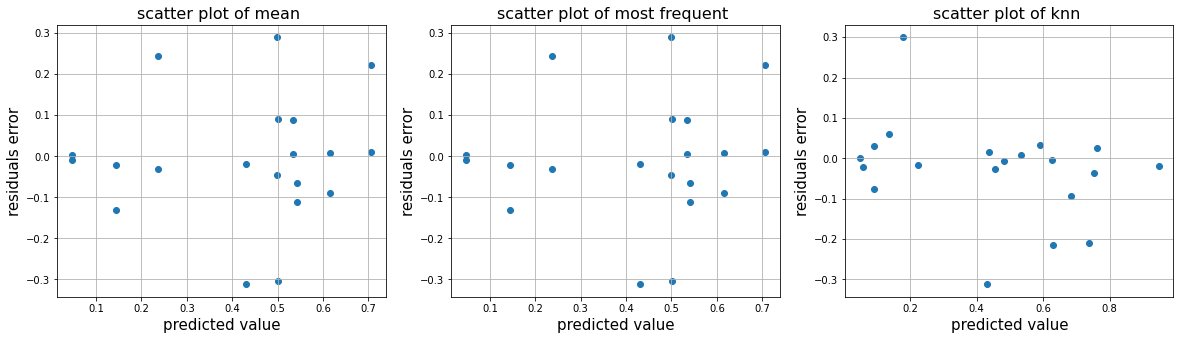

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()

In [76]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.0014982137971886272
most frequent imputation method bais error is 0.0014982137971886272
KNN imputation method bais error is 0.01583461800655434 

mean imputation method variance is 0.023332166111795158
most frequent imputation method variance is 0.023332166111795158
KNN imputation method variance is 0.01509621550223841


# 5% missing value

In [77]:
# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_5per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_5per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_5per)

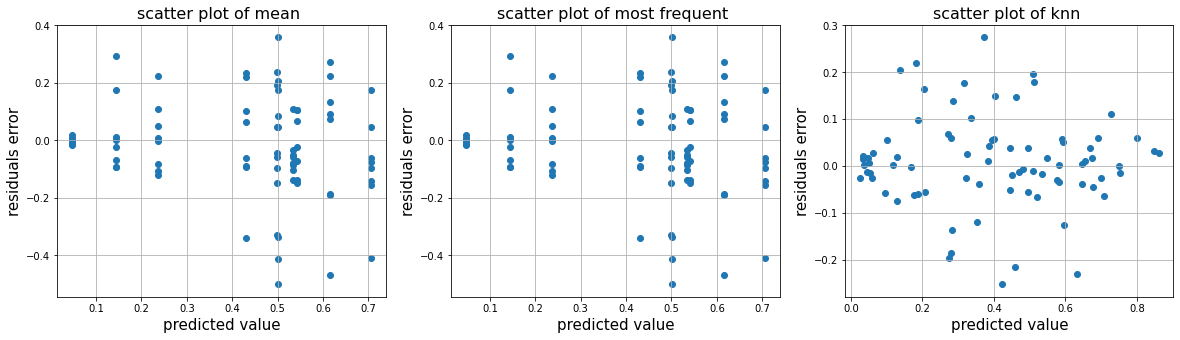

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()

In [79]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.031708973074274706
most frequent imputation method bais error is 0.031708973074274706
KNN imputation method bais error is 0.006246444000499502 

mean imputation method variance is 0.029332680490810524
most frequent imputation method variance is 0.029332680490810524
KNN imputation method variance is 0.009718749623247125


# 10% missing value

In [80]:
# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_10per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_10per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_10per)

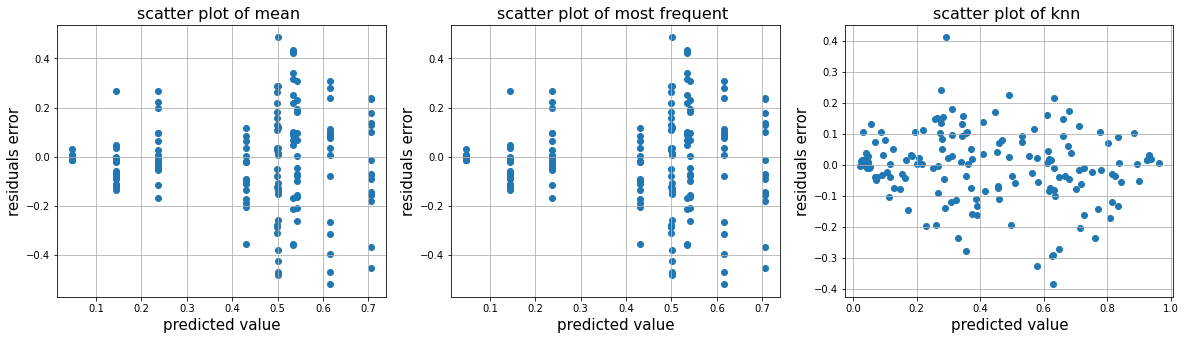

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()

In [82]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.0248909953548927
most frequent imputation method bais error is 0.0248909953548927
KNN imputation method bais error is 0.00526506317931446 

mean imputation method variance is 0.03743549104369982
most frequent imputation method variance is 0.03743549104369982
KNN imputation method variance is 0.013346747166333571


# Conclusion

From the above analysis it is clear that Happiness Score can be well predicted by almost all the independent variables since they all are significant variables as per the regression results.

# Refrences




1.   GeeksForGeeks Quantile-Quantile plot documentation https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
2.   Matplotlib documentation, Scikit-learn Documentation, Pandas Official Documentation, Analytics Vidya
3.  Many techniques used in this notebook have been adopted from the following
 github repositories
 
*   Owner - AI SkunkworksLink - https://github.com/aiskunks/Skunks_SkoolAuthor 
*   name - Prof Nik Bear BrownLink - https://github.com/nikbearbrown/

4. The methods and parameters of the models amd code corrections have been adapted from stackoverflowLink - https://stackoverflow.com






LicensingCopyright 2023 Vivek Basavanth Hanagoji

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


*THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.*